# "PCA Concepts: A visually intuitive outline"

## 1 Point Clouds

Point clouds are collections of 3D points located randomly in space. Data for a number of 3D point clouds are available at https://people.sc.fsu.edu/~jburkardt/data/ply/. For each point cloud, there is a .ply file that lists (x,y,z) co-ordinates of points for a 3D object. A corresponding .jpg file is also provided that gives a visual image of the object. We have selected 6 objects from here and created .csv files from their .ply files by removing the header and replacing the tab separator with commas.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy

In [16]:
optionToFilename = {
    "1":('airplane','airplane_pointcloud.csv'),
    "2":('big porsche','bigporsche_pointcloud.csv'),
    "3":('cow','cow_pointcloud.csv'),
    "4":('canstick','canstick_pointcloud.csv'),  # Interesting case
    "5":('egret','egret_pointcloud.csv'),
    "6":('galleon','galleon_pointcloud.csv')
}

option = "1"
filename = (optionToFilename[option])[1]

in_nodes = np.matrix(np.loadtxt("data/pca/" + filename, delimiter=","))

## 2 Reorient the point clouds
Carry out affine transformations to rotate the 3D object by angles *theta1*, *theta2* and *theta3* about the x, y and z axes respectively. Refer https://en.wikipedia.org/wiki/Affine_transformation. This effectively orients the object in a way that makes it hard to view and make out.  
Through PCA, we will be able to orient it back to a co-ordinate system where its characteristics will be observable in a much better way.

In [17]:
print(in_nodes.shape)
theta1 = np.pi / 6
theta2 = np.pi / 6
theta3 = np.pi / 2

rot_matrix1 = np.matrix([[1,0,0],[0, np.cos(theta1),-np.sin(theta1)],[0,np.sin(theta1),np.cos(theta1)]])
rot_matrix2 = np.matrix([[np.cos(theta2),0,np.sin(theta2)],[0,1,0],[-np.sin(theta2),0, np.cos(theta2)]])
rot_matrix3 = np.matrix([[np.cos(theta3),-np.sin(theta3),0],[np.sin(theta3),np.cos(theta3),0],[0,0,1]])

nodes = np.matmul(np.matmul(np.matmul(in_nodes, rot_matrix1), rot_matrix2), rot_matrix3)
print(nodes.shape)

(1335, 3)
(1335, 3)


In [18]:
Xin = in_nodes[:,0].A1
Yin = in_nodes[:,1].A1
Zin = in_nodes[:,2].A1

X = nodes[:,0].A1  # 1 D array from matrix !
Y = nodes[:,1].A1
Z = nodes[:,2].A1


In [19]:
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to

def set_axes_radius(ax, origin, radius):
    ax.set_xlim3d([origin[0] - radius, origin[0] + radius])
    ax.set_ylim3d([origin[1] - radius, origin[1] + radius])
    ax.set_zlim3d([origin[2] - radius, origin[2] + radius])

def set_axes_equal(ax):
    '''Make axes of 3D have equal scale so that spheres appear as spheres,
    cubes as cubes etc. This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.'''
    
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d()
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    set_axes_radius(ax, origin, radius)

Below we show the original object and how it appears after the rotational transformations.

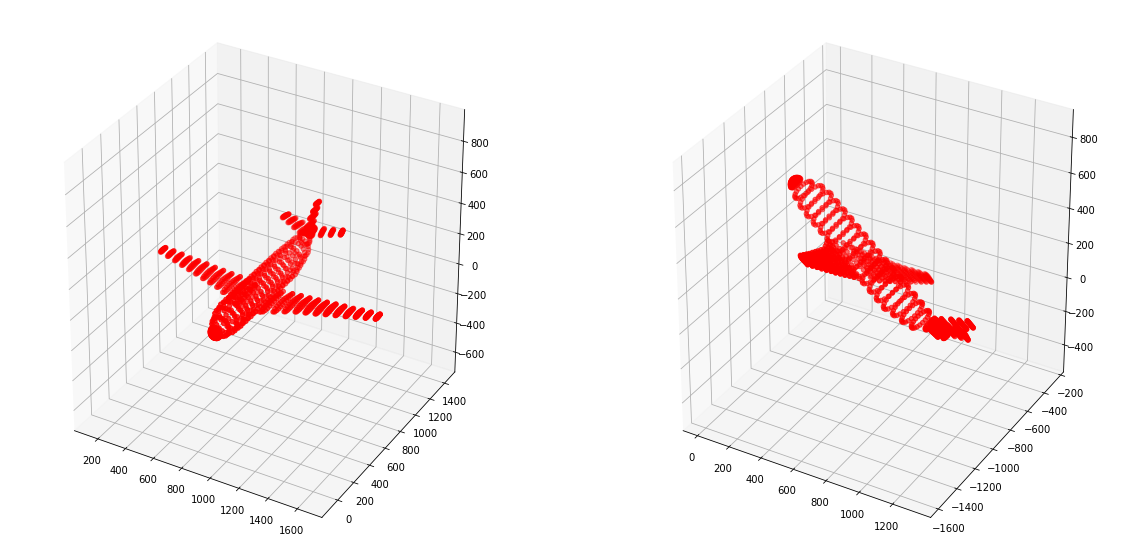

In [20]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
#ax1.axis("equal")

# ax1.set_aspect('equal')
# ax2.set_aspect('equal')

ax1.scatter(Xin,Yin,Zin,c='r',marker='o')
ax2.scatter(X,Y,Z,c='r',marker='o')

set_axes_equal(ax1)
set_axes_equal(ax2)

plt.show()

## 3 Compute the Covariance Matrix

In [21]:
covmat = np.cov(nodes.transpose())
print("nodes shape: {}".format(nodes.shape))
print("covmat shape: {}".format(covmat.shape))
print("Covariance matrix: \n{}".format(covmat))

nodes shape: (1335, 3)
covmat shape: (3, 3)
Covariance matrix: 
[[119616.61560208 -24839.56134461 -43023.4510968 ]
 [-24839.56134461  77996.14839892 -31346.91380183]
 [-43023.4510968  -31346.91380183  41799.87773916]]


## 4 Compute the Eigenvectors and Eigenvalues for the Covariance Matrix

In [22]:
eigvals, eigvecs = np.linalg.eig(covmat)

In [23]:
eigvals

array([  2608.91255   , 140709.42477358,  96094.30441658])

In [24]:
eigvecs

array([[ 3.90813509e-01,  9.20469881e-01,  7.39426951e-07],
       [ 4.60234918e-01, -1.95406049e-01, -8.66025575e-01],
       [ 7.97150313e-01, -3.38454834e-01,  4.99999703e-01]])

## 5 Verify that the Eigenvectors are orthogonal and normalized to unit length

In [25]:
# Take pairwise dot product and show it to be zero to illustrate orthogonality
# Also show that the vectors returned are normalized to unit length

for i in range(eigvecs.shape[1]):
    for j in range(i+1,eigvecs.shape[1]):
        dot = np.dot(eigvecs[:,i], eigvecs[:,j])
        print("eigvec[{}] dot eigvec[{}] = {}"
              .format(i,j,np.around(dot, 5))
             )
        
for i in range(eigvecs.shape[1]):
   norm = np.linalg.norm(eigvecs[:,i])
   print("eigvecs[{}], norm={}".format(i,np.around(norm,5)))

eigvec[0] dot eigvec[1] = 0.0
eigvec[0] dot eigvec[2] = 0.0
eigvec[1] dot eigvec[2] = 0.0
eigvecs[0], norm=1.0
eigvecs[1], norm=1.0
eigvecs[2], norm=1.0


## 6 Project the 3D pointcloud into the eigenvector space to see how it looks

(1335, 3)


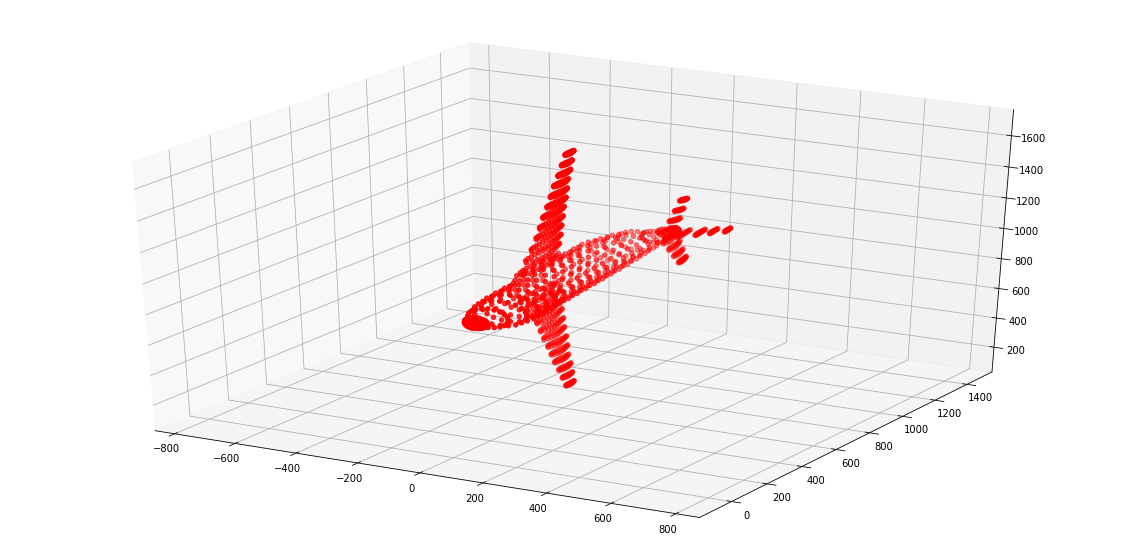

In [26]:

nodes_eig_basis = np.matmul(nodes,eigvecs)

print(nodes_eig_basis.shape)

X = nodes_eig_basis[:,0].A1  # 1 D array from matrix !
Y = nodes_eig_basis[:,1].A1
Z = nodes_eig_basis[:,2].A1

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')

# ax1.set_aspect('equal')

ax1.scatter(X,Y,Z,c='r',marker='o')

set_axes_equal(ax1)

plt.show()

## 7 Project to 2D space i.e. Dimensionality Reduction

The Eigenvectors are sorted in descending order of Eigenvalue and pairs are selected from them. The first pair corresponds to the two Eigenvetors with maximum value. This will capture the maximum variance out of all the three pairs. The projection is indeed clear evidence of that. The first visual representation matches the original 3D object much more closely than the subsequent ones which correspond to Eigenvectors with lower Eigenvalues that capture less of the variance.

(3,)
PCA1 shape: (1335, 2)
PCA2 shape: (1335, 2)
PCA3 shape: (1335, 2)


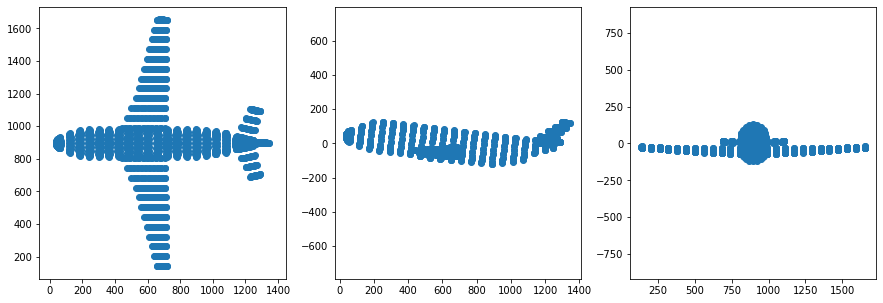

In [27]:
print(eigvals.shape)
eigval_dict = { eigvals[i]:i for i in range(len(eigvals)) } # dict with indexes as values 
eigval_idx = [ eigval_dict[k] for k in sorted(eigval_dict.keys(), reverse=True) ] # list of indexes according to eigval


pca1 = np.matmul(nodes, eigvecs[:,[eigval_idx[0],eigval_idx[1]]])
print("PCA1 shape: {}".format(pca1.shape))
pca2 = np.matmul(nodes, eigvecs[:,[eigval_idx[0],eigval_idx[2]]])
print("PCA2 shape: {}".format(pca2.shape))
pca3 = np.matmul(nodes, eigvecs[:,[eigval_idx[1],eigval_idx[2]]])
print("PCA3 shape: {}".format(pca1.shape))


fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(131)
ax1.axis("equal")
ax1.scatter(pca1[:,0].A1,pca1[:,1].A1)


ax2 = fig.add_subplot(132)
ax2.axis("equal")
ax2.scatter(pca2[:,0].A1,pca2[:,1].A1)


ax3 = fig.add_subplot(133)
ax3.axis("equal")
ax3.scatter(pca3[:,0].A1,pca3[:,1].A1)


plt.show()


## 8 Project to 1D space as well: Further Dimensionality Reduction
We can see how information is lost as dimensionality is reduced. Now it is much harder to deduce the original form of the object. But still the Eigenvector with highest Eigenvalue does better than those with lesser value.

PCA1 shape: (1335, 1)
PCA2 shape: (1335, 1)
PCA3 shape: (1335, 1)


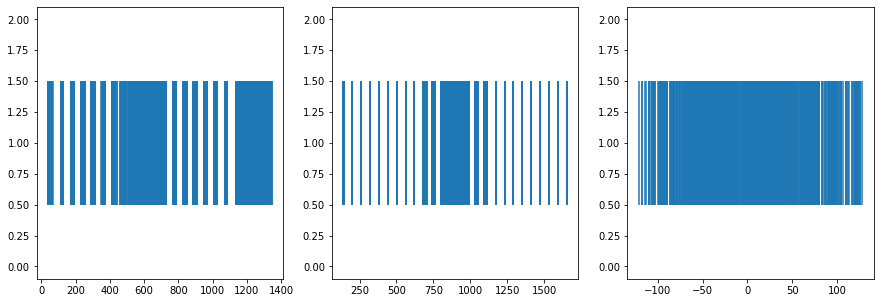

In [28]:
pca1_1 = np.matmul(nodes, eigvecs[:,[eigval_idx[0]]])
print("PCA1 shape: {}".format(pca1_1.shape))
pca2_1 = np.matmul(nodes, eigvecs[:,[eigval_idx[1]]])
print("PCA2 shape: {}".format(pca2_1.shape))
pca3_1 = np.matmul(nodes, eigvecs[:,[eigval_idx[2]]])
print("PCA3 shape: {}".format(pca3_1.shape))


fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(131)
ax1.eventplot(pca1_1.A1, orientation='horizontal')


ax2 = fig.add_subplot(132)
ax2.eventplot(pca2_1.A1, orientation='horizontal')

ax3 = fig.add_subplot(133)
ax3.eventplot(pca3_1.A1, orientation='horizontal')

plt.show()

## 9 References

- https://www.khanacademy.org/computer-programming/3d-teapot/971436783
- http://blog.ephorie.de/intuition-for-principal-component-analysis-pca
